### **Things to do**
- [ ] Code explanation
- [ ] (OPTIONAL) Convert the .ipynb to .py
- [ ] Presentation
- [x] Import images as separate directory
- [x] Use os to import the images rather than hard coding it
- [x] Convertion of rgb to grayscale
- [x] Cropping the image to only manipulation zone
- [x] K-means clustering
- [x] Evaluation Metrics
- [x] Distance Transform



In [137]:
# Importing the image and visualizing it.

import cv2
import os
import pandas as pd

root_repo = os.path.dirname(os.path.abspath('/home/lil-e-va/Downloads/ML_project/empty_-_detection_ML/data'))
img_path = os.path.join(root_repo,'data/image_010.jpg')
img_path = os.path.normpath(img_path)

if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image file not found at: {img_path}")


image = cv2.imread(img_path,0)
print(f'The size of the image: {image.shape}')


cv2.imshow('Original',image)
cv2.waitKey(0)

cv2.destroyAllWindows()

The size of the image: (480, 640)


In [138]:
'''
Cropping the image
ref - https://learnopencv.com/cropping-an-image-using-opencv/
'''

cropped_image = image[150:410,30:640]
print(cropped_image.shape)
cv2.imshow("cropped", cropped_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

(260, 610)


### _Image Segmentation with K-means_

In [139]:
'''
Image Segmentation with Kmeans
ref - https://www.kaggle.com/code/hal1001k/image-segmentation-with-kmeans
'''

from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np

In [140]:
'''
kmeans - Clustering
ref - https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv

flatten() - return a copy of a given array in such a way that it is collapsed into one dimension.

'''

img = cv2.cvtColor(cropped_image,cv2.COLOR_GRAY2RGB)

vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 2
attempts = 10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

label = label.flatten()





The collection of cluster that belongs to 0: 
[[ 45.  45.  45.]
 [ 48.  48.  48.]
 [102. 102. 102.]
 ...
 [102. 102. 102.]
 [104. 104. 104.]
 [105. 105. 105.]]
A: 9896	B: 148704	C: 26282
center: 
[[ 60.150566  60.150566  60.150566]
 [150.93933  150.93933  150.93933 ]]


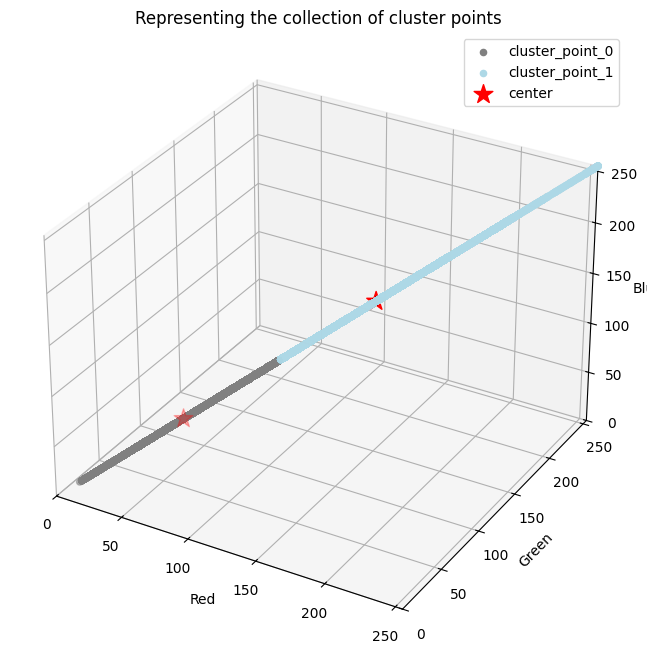

In [141]:
'''
Plotting a graph to represent the data

ref - https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/
'''

import numpy as np
import matplotlib.pyplot as plt

clusters = np.unique(label)  # Get unique cluster labels i.e., [0,1,2] 
cluster_points = {cluster: [] for cluster in clusters}  # Dictionary to store points per cluster

for cluster_id in clusters:
    cluster_points[cluster_id] = vectorized[label == cluster_id]

print(f'The collection of cluster that belongs to 0: \n{cluster_points[0]}')  # Points in cluster 0
A = cluster_points[0]
B = cluster_points[1]
# C = cluster_points[2]

print(f'A: {len(A)}\tB: {len(B)}\tC: {len(C)}')
print(f'center: \n{center}')


fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter(A[:,0],A[:,1],A[:,2],c='grey',label='cluster_point_0')
ax.scatter(B[:,0],B[:,1],B[:,2],c='lightblue',label='cluster_point_1')
# ax.scatter(C[:,0],C[:,1],C[:,2],c='purple',label='cluster_point_2')
ax.scatter(center[:,0],center[:,1],center[:,2],s=200,c='red',marker='*',label="center")




ax.set_xlim([0,255])
ax.set_ylim([0,255])
ax.set_zlim([0,255])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title("Representing the collection of cluster points")
ax.legend()



result image: (260, 610, 3)


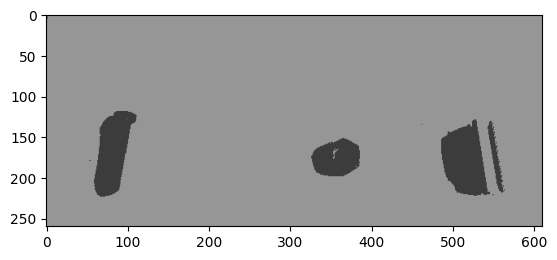

In [142]:
center = np.uint8(center)
res = center[label]
result_image = res.reshape((img.shape))

print(f'result image: {result_image.shape}')

plt.imshow(result_image)
plt.show()

### _Comparing Original and Segmented Image_

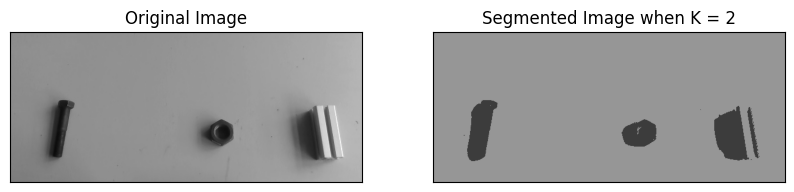

In [143]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### _Evaluation Metrics_

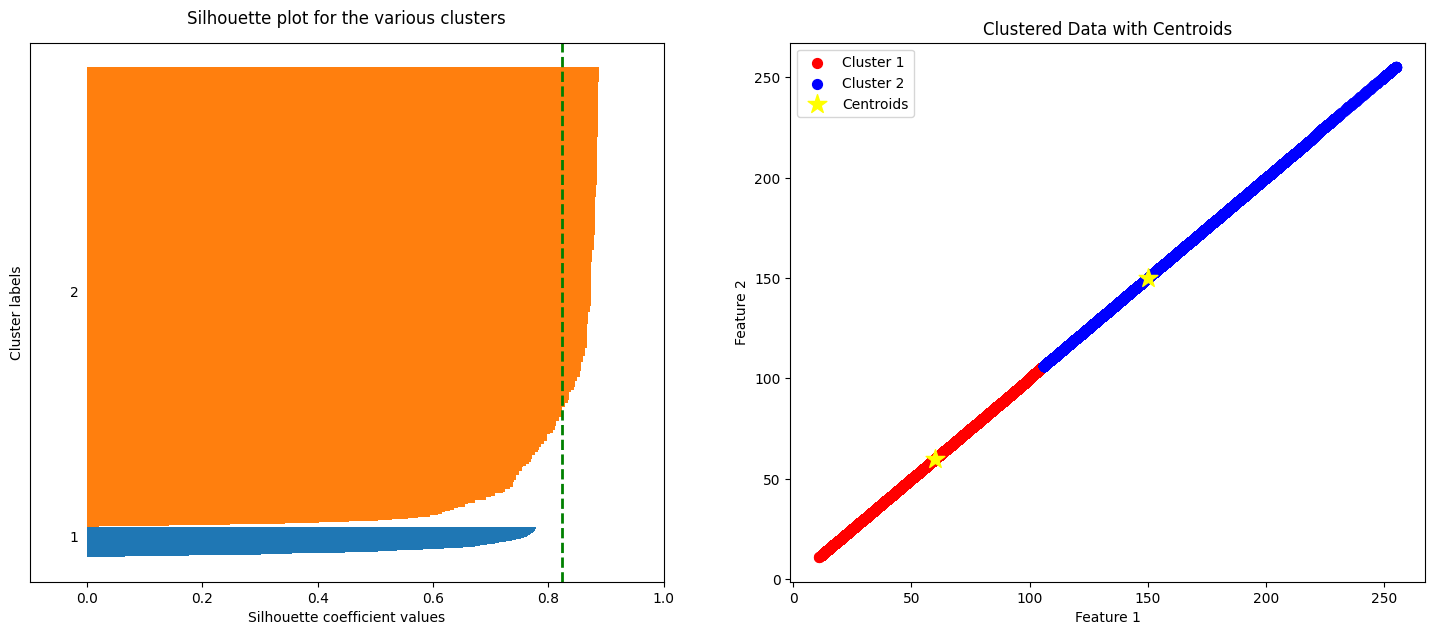

In [144]:
'''
Silhouette Method
'''

label = label.flatten()  # Flatten labels array

# Compute silhouette values
silhouette_vals = silhouette_samples(vectorized, label)

# Plot silhouette analysis
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(label)):
    cluster_silhouette_vals = silhouette_vals[label == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Plot the average silhouette score
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02)

# Scatter plot of the clusters
colors = ['red', 'blue', 'green']
for i, cluster in enumerate(np.unique(label)):
    cluster_data = vectorized [label == cluster]
    ax2.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=colors[i], label=f'Cluster {i + 1}')
ax2.scatter(center[:, 0], center[:, 1], s=200, color='yellow', marker='*', label='Centroids')
ax2.set_title('Clustered Data with Centroids')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.show()


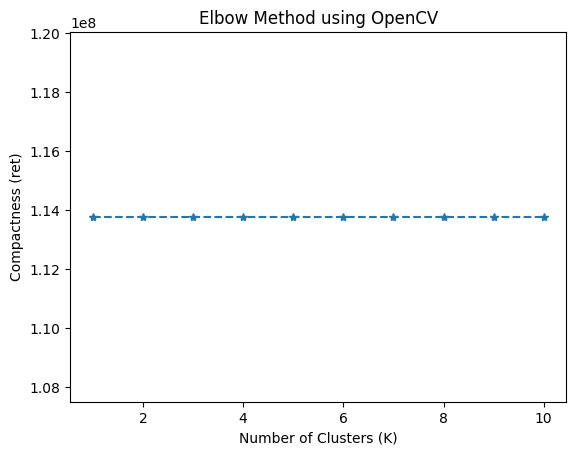

In [145]:
'''
Evaluation Metrics
    1. Elbow Method 
    2. Silhouette Method
ref - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

'''

### --- Elbow Method --- ###

compactness_values=[] # Sum of squared distance b/w data pair points and their assigned clusters
list_k = list(range(1,11))

for k in list_k:
    ret,label,center = cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
    compactness_values.append(ret)


plt.figure()
plt.plot(list_k, compactness_values,marker='*',linestyle='--')
plt.title('Elbow Method using OpenCV')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Compactness (ret)')
plt.show()




### _Distance Transform_


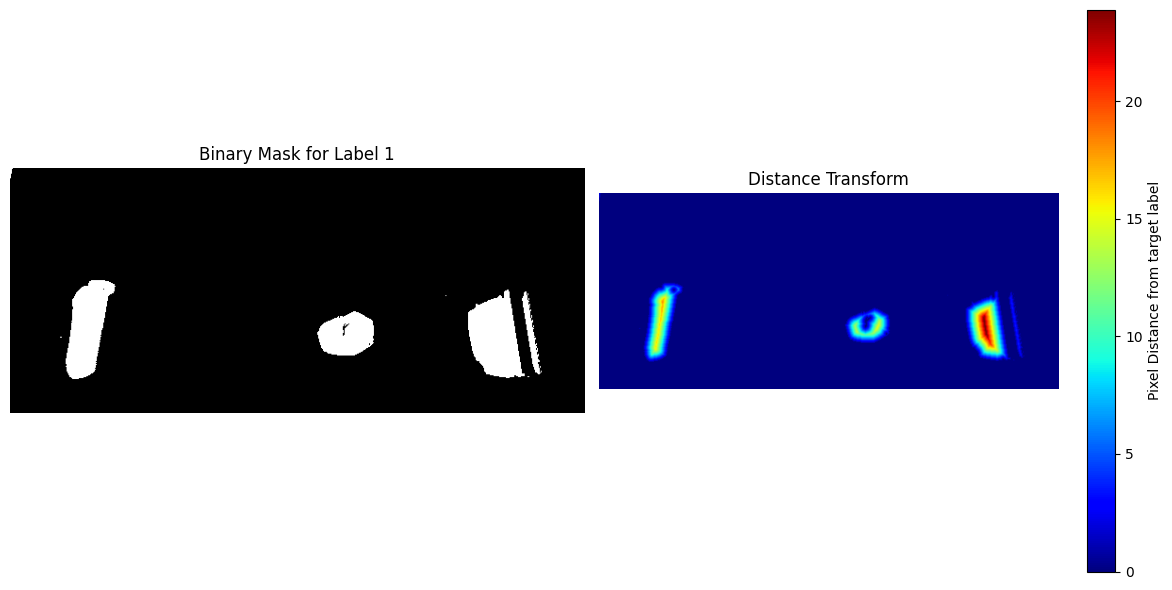

In [154]:
'''
Distance Transform is used to find the distance for only a spcific label from the segmented image.
ref - https://www.geeksforgeeks.org/python-opencv-distancetransform-function/
'''


target_label =1

binary_mask = (label == target_label).astype(np.uint8).reshape(-1, 1) 

original_height, original_width = 260, 610
binary_mask = binary_mask.reshape(original_height, original_width)

# Computing the distance transform
distance_map = cv2.distanceTransform(binary_mask, cv2.DIST_L2, 3)

# Plot the binary mask and the distance transform
plt.figure(figsize=(12, 6))

# Binary Mask
plt.subplot(1, 2, 1)
plt.imshow(binary_mask, cmap='gray')
plt.title(f'Binary Mask for Label {target_label}')
plt.axis('off')

# Distance Transform
plt.subplot(1, 2, 2)
plt.imshow(distance_map, cmap='jet')
plt.title('Distance Transform')
plt.colorbar(label='Pixel Distance from target label')
plt.axis('off')

plt.tight_layout()
plt.show()


2


(np.float64(-0.5), np.float64(609.5), np.float64(259.5), np.float64(-0.5))

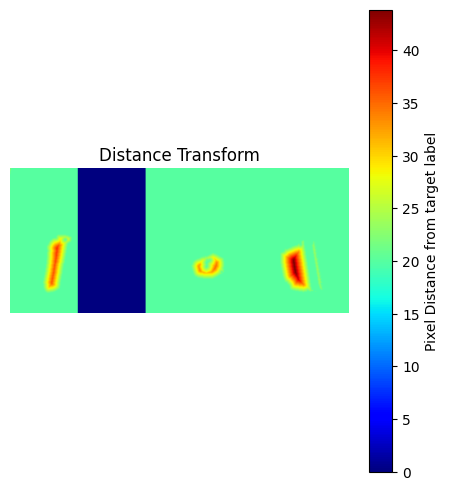

In [155]:
'''
Creating patches to identify the free space from the distance transform
'''
c = distance_map.shape[1]

col = 0
for i in range(1,6):
    end_col = int(i*(c/5))
    
    if(np.all(distance_map[:, col:end_col]==0)):
        print(i)

    else:

        distance_map[:, col:end_col] +=20

    col = end_col


plt.figure(figsize=(12, 6))


# Distance Transform
plt.subplot(1, 2, 2)
plt.imshow(distance_map, cmap='jet')
plt.title('Distance Transform')
plt.colorbar(label='Pixel Distance from target label')
plt.axis('off')

### NOT REQUIRED

**Is it a wise option to resize the image??? Use Cropped Image for now.**

In [148]:
'''
[NOT REQUIRED]
Resizing the image
ref - https://learnopencv.com/image-resizing-with-opencv/
'''

downscale_val = (256,256)
imgresized = cv2.resize(cropped_image,downscale_val,interpolation=cv2.INTER_AREA)

print(imgresized.shape)
cv2.imshow('resize_image',imgresized)
cv2.waitKey(0)

cv2.destroyAllWindows()

(256, 256)


### **Trying to change the a particular color of the pixels to other colors**

In [149]:
'''
[NOT REQUIRED]
To pick the color values from the image the following website was used.
ref - https://imagecolorpicker.com/

Upload your image and use the eyedropper to find the color of that particular pixel.
o/p -> 150,150,150 to 185,185,185 are the free space areas from the manipulation we are going to color that.
'''

import numpy as np

img = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB) 
vectors = img.reshape((-1,3))
# print(f'vectors Image values :{vectors}')
print(f'vectors Image shape :{vectors.shape}')

# Below code is to understand the number of the rows which are accessible.

count_rows = 0
count_changed_r = 0
count_changed_g = 0
count_changed_b = 0
count_r = 0
count_g = 0
count_b = 0
count_b_w_range =0

for j in range (0,3):
    for i,value in enumerate(vectors[:,j]):
        count_rows+=1
        # print(f'index: {i}')
        # print(f'value: {value}')
        if j==0:
            count_r+=1
            if 149<value<186:
                count_changed_r+=1    
                vectors[i,j]=0
        elif j==1:
            count_g+=1
            if 149<value<186:
                count_changed_g+=1
                vectors[i,j]=128
        else:
            count_b+=1
            if 149<value<186:
                count_changed_b+=1
                vectors[i,j]=0
        if 149<value<186:
            # print(f'value satisfies the conditions are: {value}')
            count_b_w_range+=1

# print(f'rows: {count_rows}')
# print(f'Number of pixels r: {count_r}')
# print(f'Number of pixels g: {count_g}')
# print(f'Number of pixels b: {count_b}')
print(f'Number of pixels r values that changed to zero: {count_changed_r}')
print(f'Number of pixels g values that changed to zero: {count_changed_g}')
print(f'Number of pixels b values that changed to zero: {count_changed_b}')
print(f'Needs to be changed: {count_b_w_range}')

print(f'vectors Image values :\n{vectors}')

vectors = np.uint8(vectors)
vectors.flatten()    
result_image = vectors.reshape((img.shape)) # It has to be reshapped to the inital image format thats when the image will be shown properly

cv2.imshow("color_change", result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()





vectors Image shape :(158600, 3)
Number of pixels r values that changed to zero: 61189
Number of pixels g values that changed to zero: 61189
Number of pixels b values that changed to zero: 61189
Needs to be changed: 183567
vectors Image values :
[[ 45  45  45]
 [ 48  48  48]
 [102 102 102]
 ...
 [  0 128   0]
 [  0 128   0]
 [  0 128   0]]


### _Reshaping np array in 2D to perform kmeans_

img; (260, 610, 3)
r: [ 45  48 102 ... 178 178 178]


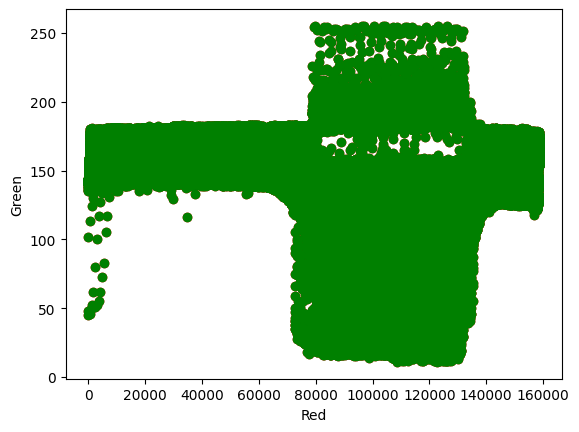

In [150]:
'''
Converting 3D image into numpy array to 2D 
Plotting the graph according to the pixel values
'''

# img = cv2.cvtColor(imgresized,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(cropped_image,cv2.COLOR_GRAY2RGB)

print(f'img; {img.shape}')
r,g,b = cv2.split(img)

r = r.flatten()
g = g.flatten()
b = b.flatten()

print(f'r: {r}')
# print(f'g: {g}')
# print(f'b: {b}')

fig = plt.figure()
# ax = fig.add_subplot(111,projection='3d')
ax = fig.add_subplot()
# ax.scatter(r,g,b)
# ax.scatter(r, g, b)
ax.scatter(range(0, len(r)), r, c="red")
ax.scatter(range(0, len(r)), g, c="green")
# ax.scatter(range(0, len(r)), b, c="blue")

ax.set_ylabel('Green')
ax.set_xlabel('Red')
# ax.set_zlabel('Blue')
plt.show()

In [151]:
# Visulaizing the labels using scatter plot

count_0 = 0
count_1 = 0
count_2 = 0
label_0 = []
label_1 = []
label_2 = []
for lab in label:
    if lab == 0:
        count_0+=1
        label_0.append(lab)

    elif lab ==1:
        count_1+=1
        label_1.append(lab)
    else:
        count_2+=1
        label_2.append(lab)

print(f'Label 0 is in nos: {count_0}')
# print(f'Label 0: {len(label_0)}')
print(f'Label 1 is in nos: {count_1}')
# print(f'Label 1: {len(label_1)}')
print(f'Label 2 is in nos: {count_2}')
# print(f'Label 2: {len(label_2)}')
print(f'center: \n{center}')



Label 0 is in nos: 148704
Label 1 is in nos: 9896
Label 2 is in nos: 0
center: 
[[150.93933  150.93933  150.93933 ]
 [ 60.150566  60.150566  60.150566]]


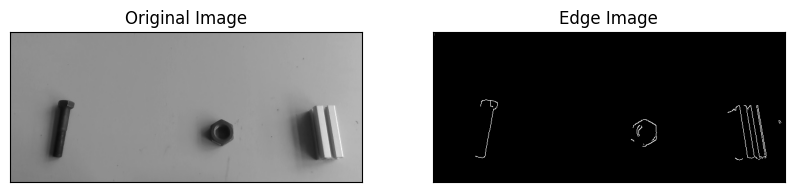

In [152]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Understand the following code to use the distance Transform

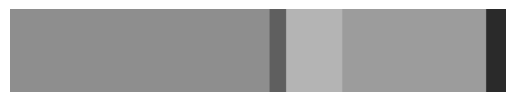

In [153]:
image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)
clt.fit(image)

def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

